In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autismprediction/Autism-prediction/sample_submission.csv
/kaggle/input/autismprediction/Autism-prediction/train.csv
/kaggle/input/autismprediction/Autism-prediction/test.csv


In [50]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [51]:
df=pd.read_csv("/kaggle/input/autismprediction/Autism-prediction/train.csv")

In [52]:
df.shape

(800, 22)

In [53]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [54]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,1,1,1,1,1,1,1,1,1,1,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0
799,800,1,0,0,1,1,0,0,1,1,1,32.170098,f,Asian,no,no,New Zealand,no,12.060168,18 and more,Self,0


In [55]:
pd.set_option('display.max_columns',None)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [57]:
df["age"]=df["age"].astype(int)

In [58]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0


In [59]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [1 0]
--------------------------------------------------
A7_Score [0 1]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [60]:
# dropping ID & age_desc column
df = df.drop(columns=["ID", "age_desc"])

In [61]:
df.shape

(800, 20)

In [62]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,?,0


In [63]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [64]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [65]:
# taget class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    615
1    185
Name: count, dtype: int64

**Insights:**
1. missing values in ethnicity & relation
2. age_desc column has only 1 unique value. so it is removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target columnolumn

**3. Exploratory Data Analysis (EDA)**

In [66]:
df.shape

(800, 20)

In [67]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [68]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,?,0


In [69]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.11500,7.058530,0.231250
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.88611,3.788969,0.421896
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.00000,-2.594654,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.00000,4.527556,0.000000
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.00000,6.893472,0.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.00000,9.892981,0.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.00000,13.390868,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result

In [70]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 28.115
Median: 25.0


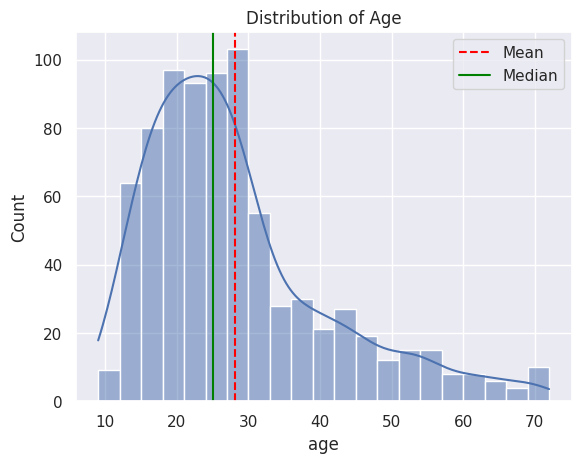

In [71]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 7.05852953134875
Median: 6.8934719235


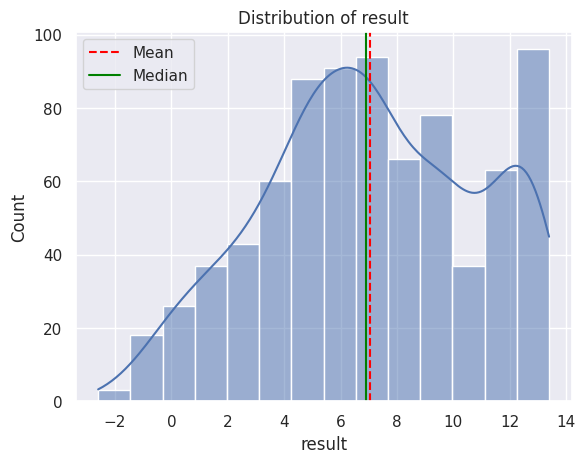

In [72]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

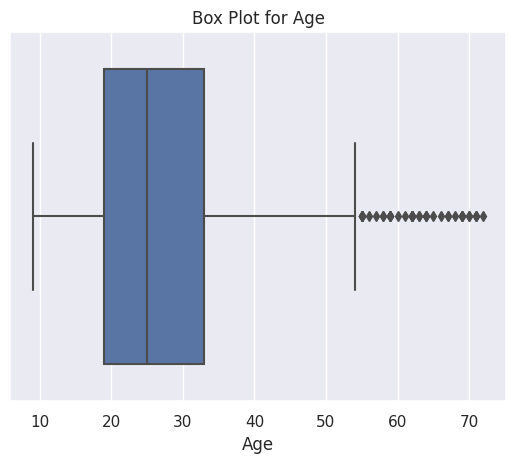

In [73]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

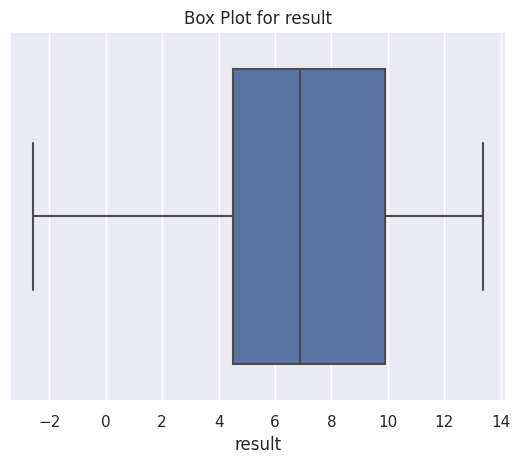

In [74]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [75]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [76]:
len(age_outliers)

43

In [77]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [78]:
len(result_outliers)

0

Univariate analysis of Categorical columns

In [79]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

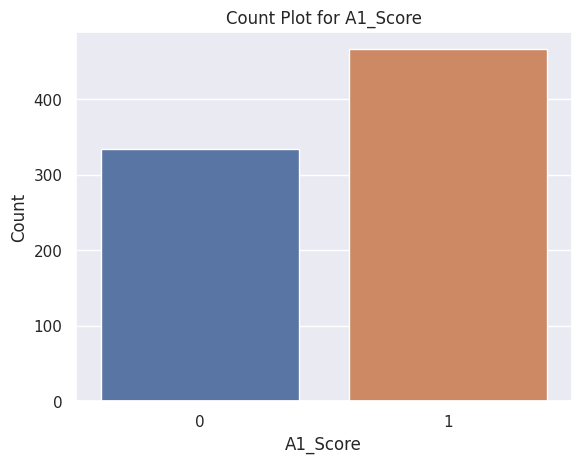

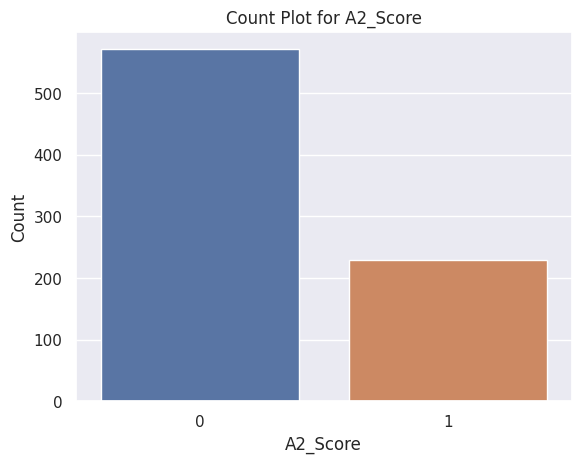

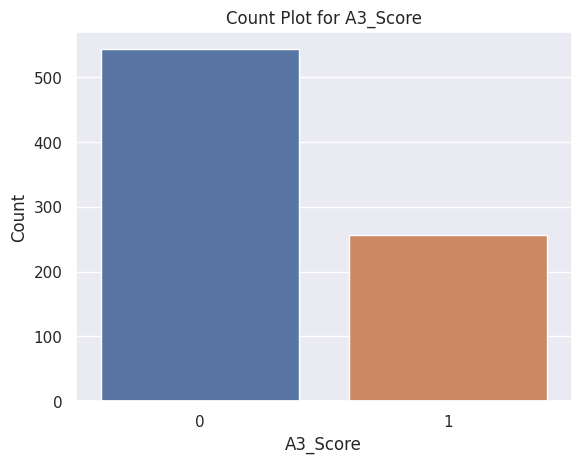

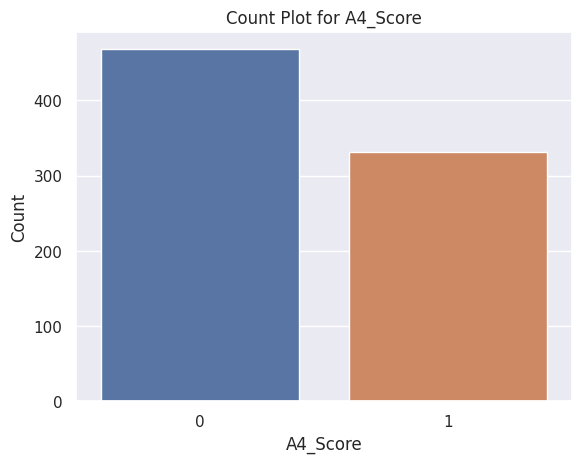

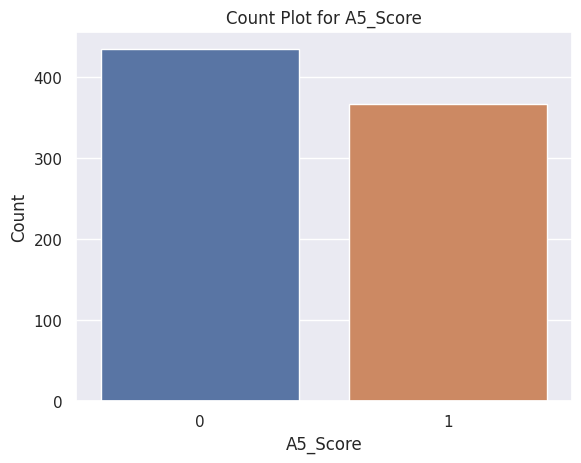

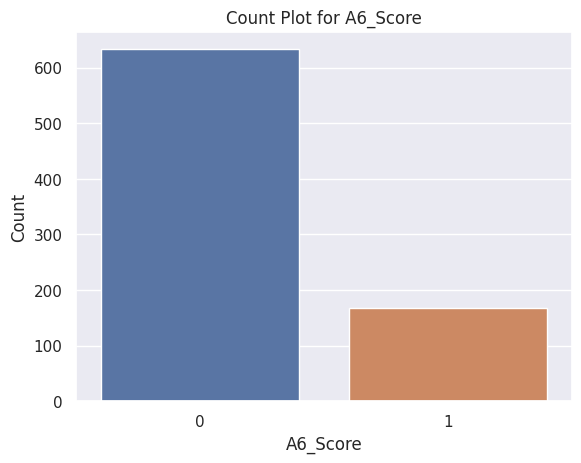

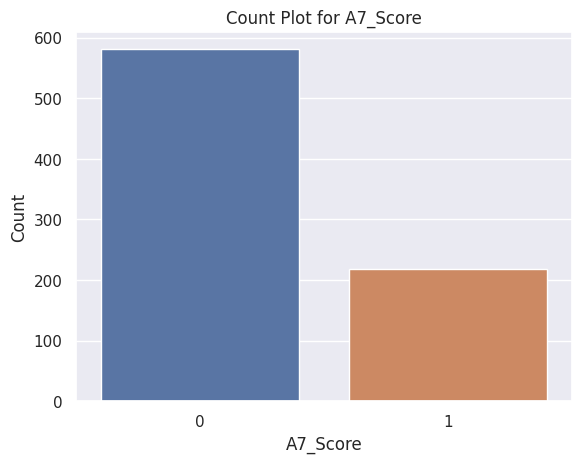

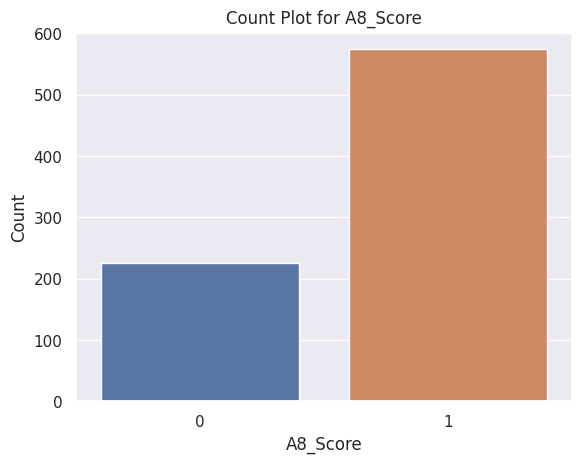

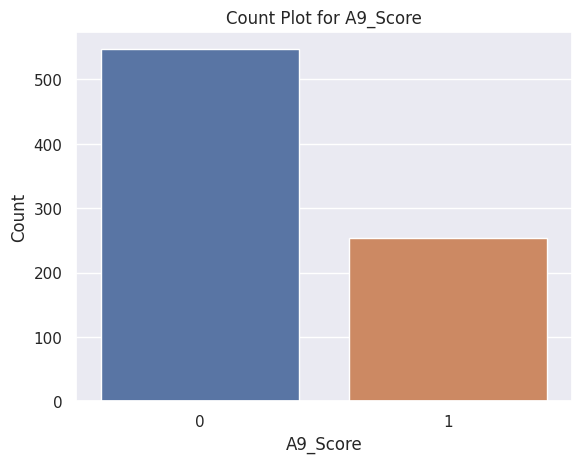

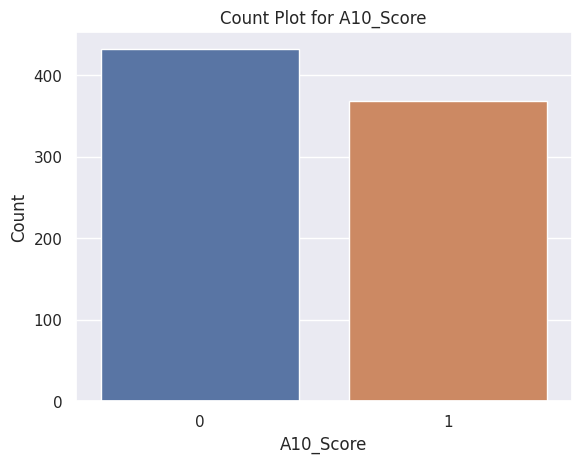

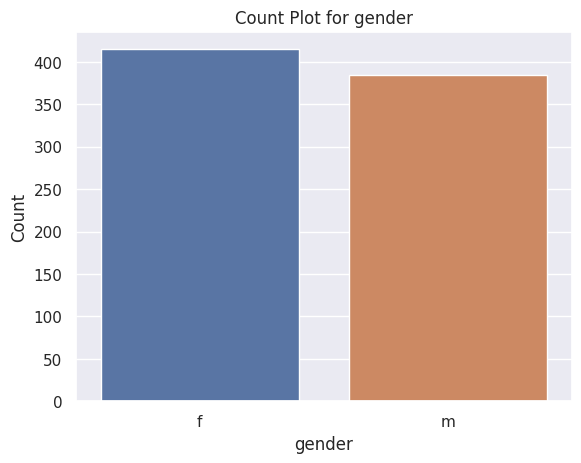

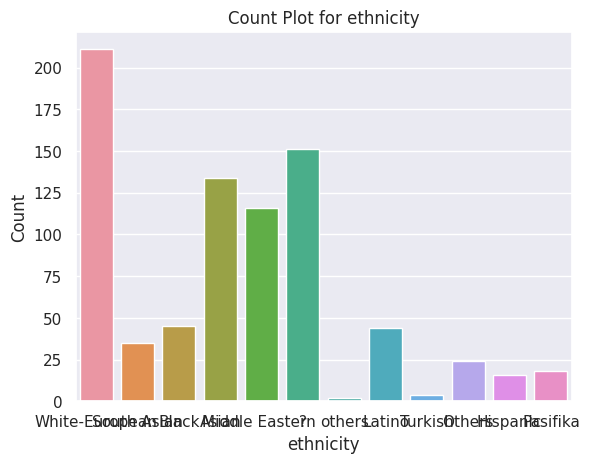

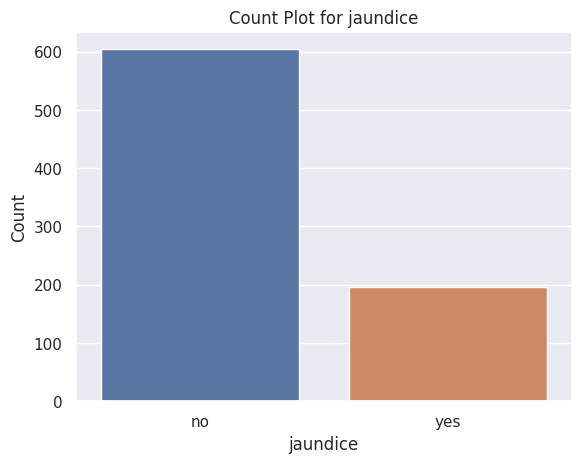

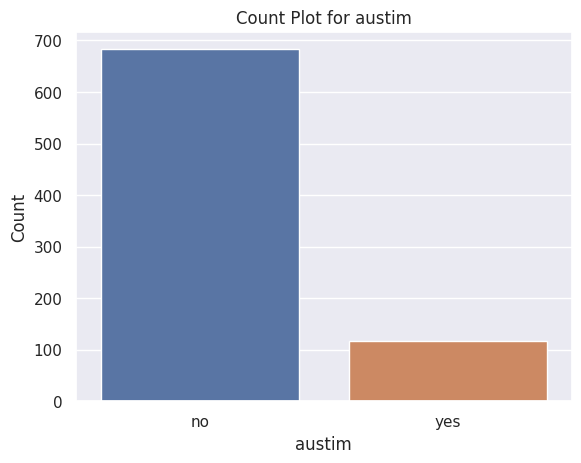

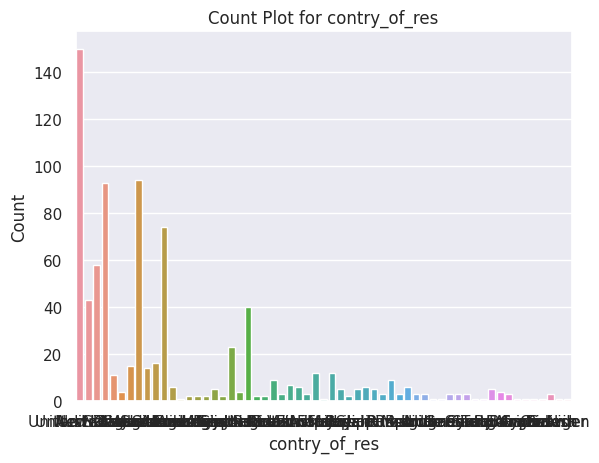

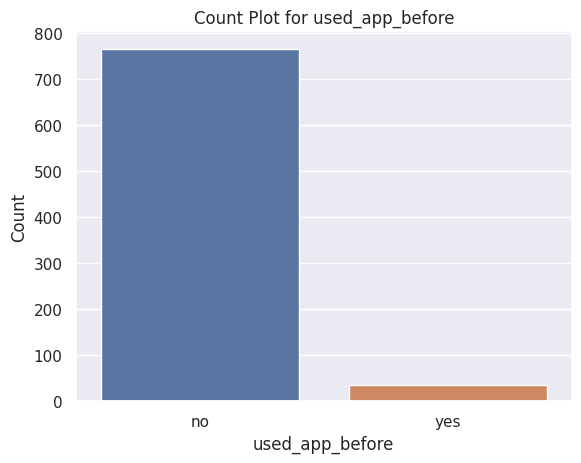

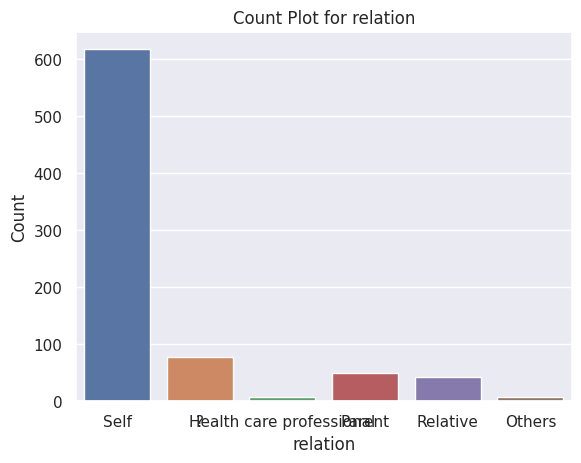

In [80]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

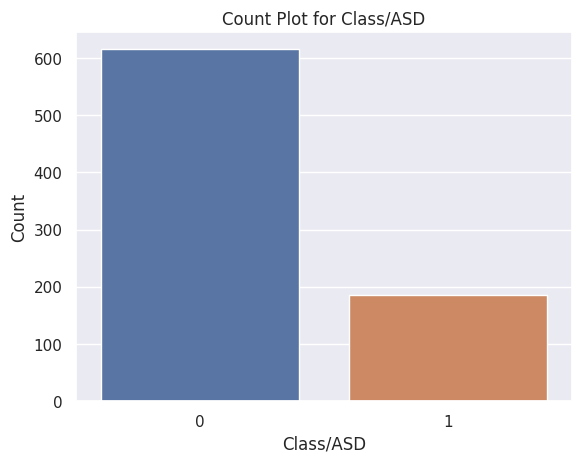

In [82]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [83]:
df["Class/ASD"].value_counts()

Class/ASD
0    615
1    185
Name: count, dtype: int64

handle missing values in ethnicity and relation column

In [84]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [85]:
df["ethnicity"].unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', 'Others', 'Latino', 'Turkish', 'Hispanic',
       'Pasifika'], dtype=object)

In [86]:
df["relation"].unique()

array(['Self', '?', 'Health care professional', 'Parent', 'Relative',
       'Others'], dtype=object)

In [87]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [88]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [89]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,Others,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,1.530098,Others,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,7.949723,Self,0


**Label Encoding**

In [90]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [91]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [92]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [93]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [94]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,0,9,0,0,56,0,7.819715,1,0
1,0,0,0,0,0,0,0,0,0,1,13,0,7,0,0,5,0,10.544296,0,0
2,1,1,1,1,1,1,0,0,1,1,14,0,9,0,0,55,0,13.167506,1,1
3,0,0,0,1,0,0,0,0,0,0,61,0,7,0,0,37,0,1.530098,0,0
4,0,0,0,0,1,0,0,0,1,1,14,1,1,0,1,30,0,7.949723,1,0


Bivariate Analysis

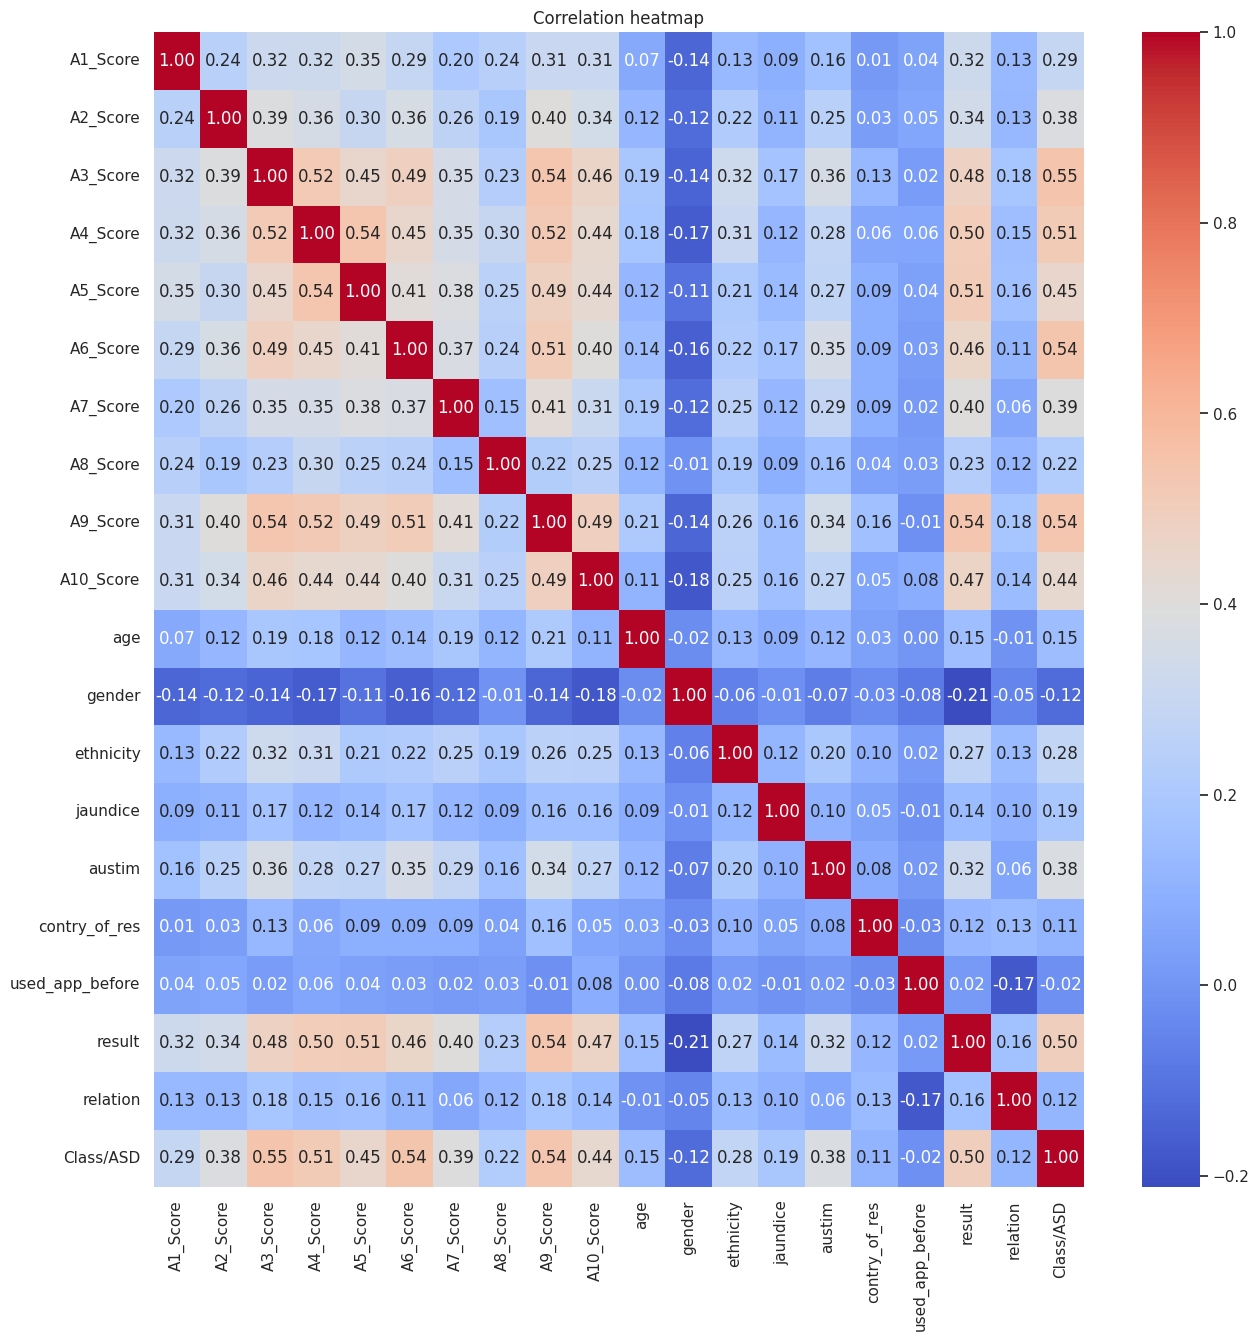

In [95]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

**4. Data preprocessing**

Handling teh outliers

In [96]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [97]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [98]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.0,0,9,0,0,56,0,7.819715,1,0
1,0,0,0,0,0,0,0,0,0,1,13.0,0,7,0,0,5,0,10.544296,0,0
2,1,1,1,1,1,1,0,0,1,1,14.0,0,9,0,0,55,0,13.167506,1,1
3,0,0,0,1,0,0,0,0,0,0,25.0,0,7,0,0,37,0,1.530098,0,0
4,0,0,0,0,1,0,0,0,1,1,14.0,1,1,0,1,30,0,7.949723,1,0


In [99]:
df.shape

(800, 20)

Train Test Split

In [100]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [101]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [102]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         1         1         1         0   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         1         1         1         1         1         1         1   
796         1         1         0         0         1         0         0   
797         0         0         0         0         0         0         1   
798         1         1         1         1         1         1         0   
799         1         0         0         1         1         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [103]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    1
796    0
797    1
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [106]:
y_train.value_counts()

Class/ASD
0    494
1    146
Name: count, dtype: int64

In [107]:
y_test.value_counts()

Class/ASD
0    121
1     39
Name: count, dtype: int64

SMOTE (Synthetic Minority Oversampling technique)

In [108]:
smote = SMOTE(random_state=42)

In [109]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [110]:
print(y_train_smote.shape)

(988,)


In [111]:
print(y_train_smote.value_counts())

Class/ASD
0    494
1    494
Name: count, dtype: int64


In [112]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [113]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.81
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.89
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.89
--------------------------------------------------


In [114]:
cv_scores

{'Decision Tree': array([0.79292929, 0.80808081, 0.79292929, 0.81218274, 0.84263959]),
 'Random Forest': array([0.87373737, 0.83838384, 0.90909091, 0.91370558, 0.90862944]),
 'XGBoost': array([0.84343434, 0.86868687, 0.91919192, 0.89340102, 0.91878173])}

**6. Model Selection & Hyperparameter Tuning**

In [115]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [116]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [117]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [118]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [119]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [120]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best Cross-Validation Accuracy: 0.89


In [121]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**7. Evaluation**

In [122]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.79375
Confusion Matrix:
 [[96 25]
 [ 8 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       121
           1       0.55      0.79      0.65        39

    accuracy                           0.79       160
   macro avg       0.74      0.79      0.75       160
weighted avg       0.83      0.79      0.80       160

